In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load DataSet

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')


print(df.head())




   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Dataset Information

print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
        Person ID

In [ ]:
#Clean before exploration

df_cleaned = df.dropna()

print(df_cleaned)


     Person ID  Gender  Age            Occupation  Sleep Duration  \
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
5            6    Male   28     Software Engineer             5.9   
6            7    Male   29               Teacher             6.3   
16          17  Female   29                 Nurse             6.5   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level  BMI Category  \
3                   4                       30             8         Obese   
4              

In [ ]:
# Descriptive Statistics

# Mean, Median, Mode for Age Column
age_column = df['Age']

print("Mean(Age): ", age_column.mean())
print("Median(Age): ", age_column.median())
print("Mode(Age): ", age_column.mode()[0])


gender = df['Gender']


#gender column
gender_counts = df['Gender'].value_counts()


# gender count
print("\n", gender_counts)



Mean(Age):  42.18449197860963
Median(Age):  43.0
Mode(Age):  43

 Gender
Male      189
Female    185
Name: count, dtype: int64


In [ ]:
## Occupation types
occupation_types = df['Occupation'].value_counts()
print(occupation_types)

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64


In [ ]:
# Mean, Median, Mode, Std, Range, IQR for Sleep Duration Column


sleep_column = df['Sleep Duration']

print("Mean(Sleep): ", sleep_column.mean())
print("Median(Sleep): ", sleep_column.median())
print("Mode(Sleep): ", sleep_column.mode()[0])
print("Standard Deviation(Sleep): ", sleep_column.std())

range_sleep = sleep_column.max() - sleep_column.min()
print("Range(Sleep): ", range_sleep)




Mean(Sleep):  7.132085561497325
Median(Sleep):  7.2
Mode(Sleep):  7.2
Standard Deviation(Sleep):  0.7956567308898188
Range(Sleep):  2.7


In [ ]:
# Mean, Median, Mode for Quality of Sleep Column


qos_column = df['Quality of Sleep']

print("Mean(Quality Of Sleep): ", qos_column.mean())
print("Median(Quality Of Sleep): ", qos_column.median())
print("Mode(Quality Of Sleep): ", qos_column.mode()[0])

print("Standard Deviation(Quality Of Sleep): ", qos_column.std())

range = qos_column.max() - qos_column.min()
print("Range(Quality Of Sleep): ", range)

Mean(Quality Of Sleep):  7.31283422459893
Median(Quality Of Sleep):  7.0
Mode(Quality Of Sleep):  8
Standard Deviation(Quality Of Sleep):  1.1969559197336044
Range(Quality Of Sleep):  5


In [ ]:
# Mean, Median, Mode for Stress Level Column


stresslvl_column = df['Stress Level']

print("Mean(Stress Level): ", stresslvl_column.mean())
print("Median(Stress Level): ", stresslvl_column.median())
print("Mode(Stress Level): ", stresslvl_column.mode()[0])

print("Standard Deviation(Stress Level): ", stresslvl_column.std())

range = stresslvl_column.max() - stresslvl_column.min()
print("Range(Stress Level): ", range)


Mean(Stress Level):  5.385026737967914
Median(Stress Level):  5.0
Mode(Stress Level):  3
Standard Deviation(Stress Level):  1.7745264441985167
Range(Stress Level):  5


In [ ]:
## BMI Category of Classification
BMI_types = df['BMI Category'].value_counts()
print(BMI_types)

BMI Category
Normal          195
Overweight      148
Under Weight     21
Obese            10
Name: count, dtype: int64


In [ ]:
# Mean, Median, Mode for Daily Steps Column


dailysteps_column = df['Daily Steps']

print("Mean(DailySteps): ", dailysteps_column.mean())
print("Median(DailySteps): ", dailysteps_column.median())
print("Mode(DailySteps): ", dailysteps_column.mode()[0])

print("Standard Deviation(DailySteps): ", dailysteps_column.std())

range = dailysteps_column.max() - dailysteps_column.min()
print("Range(DailySteps): ", range)

Mean(DailySteps):  6816.844919786096
Median(DailySteps):  7000.0
Mode(DailySteps):  8000
Standard Deviation(DailySteps):  1617.915679133637
Range(DailySteps):  7000


In [ ]:
# Mean, Median, Mode for Physical Activity Level Column


pal_column = df['Physical Activity Level']

print("Mean(Physical Activity Level): ", pal_column.mean())
print("Median(Physical Activity Level): ", pal_column.median())
print("Mode(Physical Activity Level): ", pal_column.mode()[0])

print("Standard Deviation(DailySteps): ", pal_column.std())

range = pal_column.max() - pal_column.min()
print("Range(Physical Activity Level): ", range)

Mean(Physical Activity Level):  59.17112299465241
Median(Physical Activity Level):  60.0
Mode(Physical Activity Level):  60
Standard Deviation(DailySteps):  20.830803658071673
Range(Physical Activity Level):  60


In [ ]:
# Mean, Median, Mode for Heart Rate Level Column


heartrate_column = df['Heart Rate']

print("Mean(Heart Rate): ", heartrate_column.mean())
print("Median(Heart Rate): ", heartrate_column.median())
print("Mode(Heart Rate): ", heartrate_column.mode()[0])

print("Standard Deviation(Heart Rate): ", heartrate_column.std())

range = heartrate_column.max() - heartrate_column.min()
print("Range(Heart Rate): ", range)

Mean(Heart Rate):  70.16577540106952
Median(Heart Rate):  70.0
Mode(Heart Rate):  68
Standard Deviation(Heart Rate):  4.135675535112214
Range(Heart Rate):  21


In [ ]:
## Disorder_types
disorder_types = df['Sleep Disorder'].value_counts()
print(disorder_types)

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64


In [ ]:
## Histograms for each

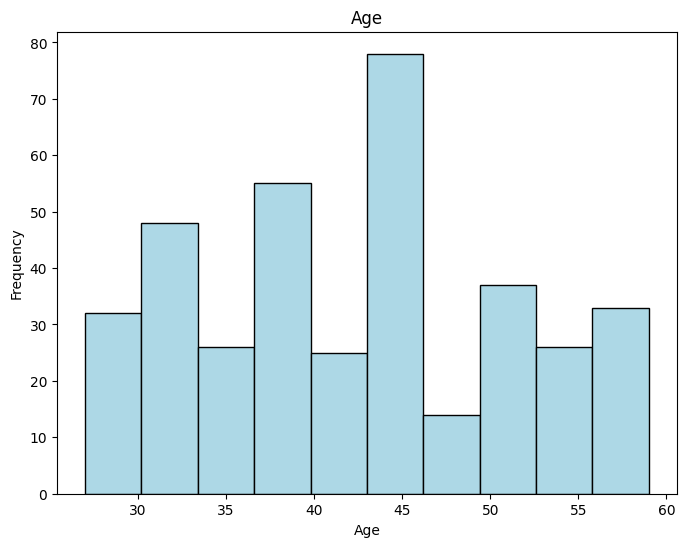

In [ ]:
## Age

plt.figure(figsize=(8, 6))
plt.hist(age_column, bins=10, color='lightblue', edgecolor='black')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

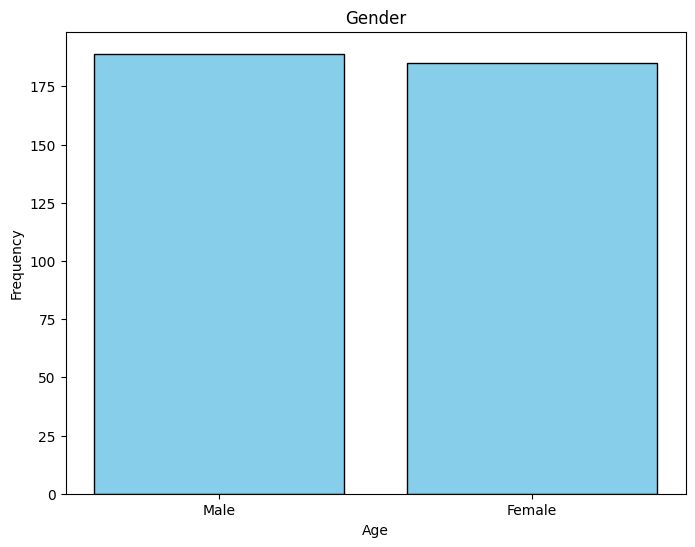

In [ ]:
## Age

plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color='skyblue', edgecolor='black')
plt.title('Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()




/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

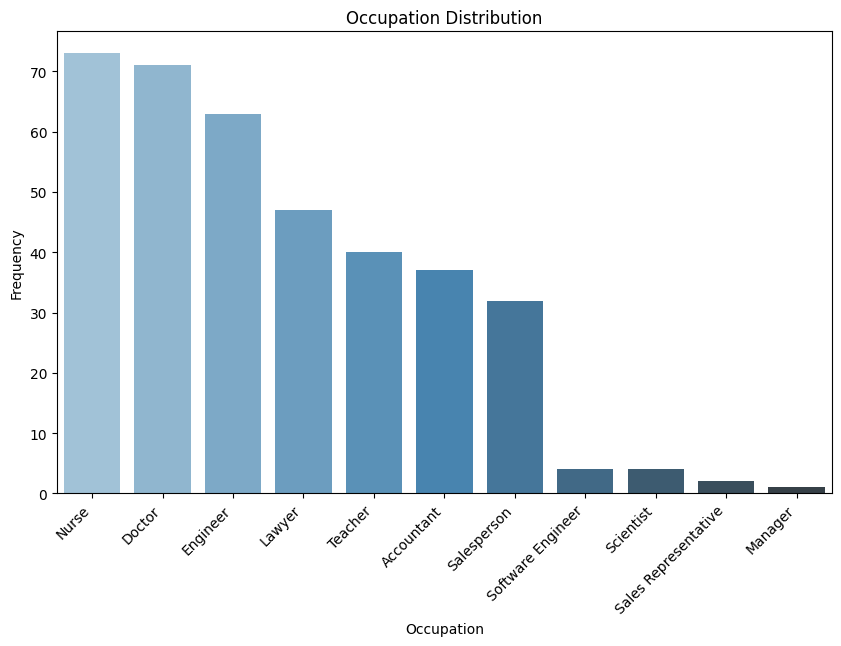

In [ ]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_types.index, y=occupation_types.values,hue=occupation_types.index, palette='Blues_d')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

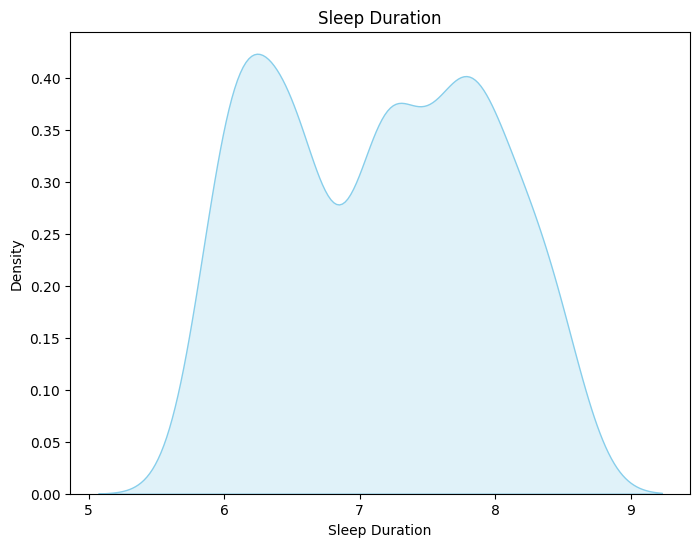

In [ ]:
 ## Sleep Duration



plt.figure(figsize=(8, 6))
sns.kdeplot(df['Sleep Duration'], fill=True, color='skyblue')
plt.title('Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Density')
plt.grid(False)
plt.show()



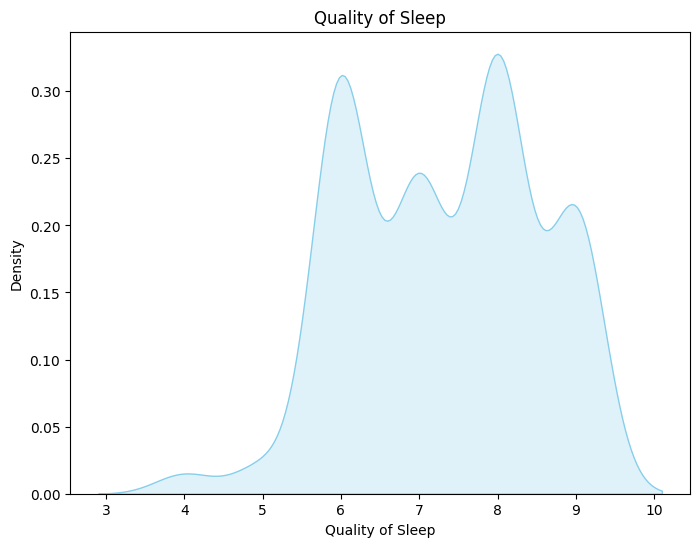

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Quality of Sleep'], fill=True, color='skyblue')
plt.title('Quality of Sleep')
plt.xlabel('Quality of Sleep')
plt.ylabel('Density')
plt.grid(False)
plt.show()

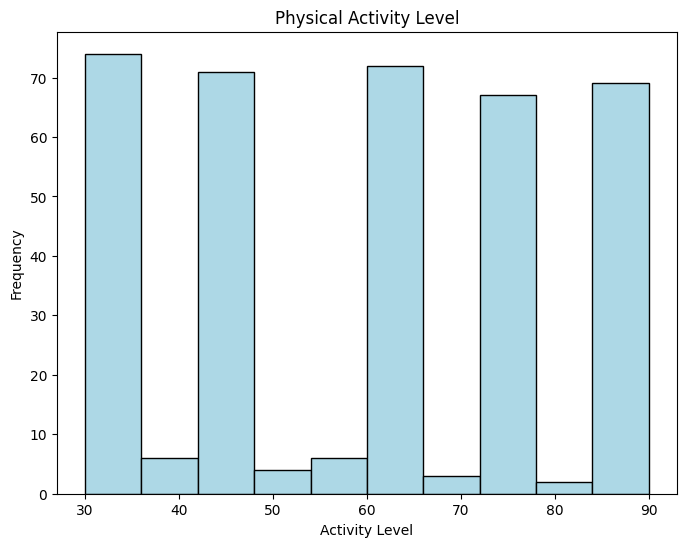

In [ ]:
## Age

plt.figure(figsize=(8, 6))
plt.hist(pal_column, bins=10, color='lightblue', edgecolor='black')
plt.title('Physical Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

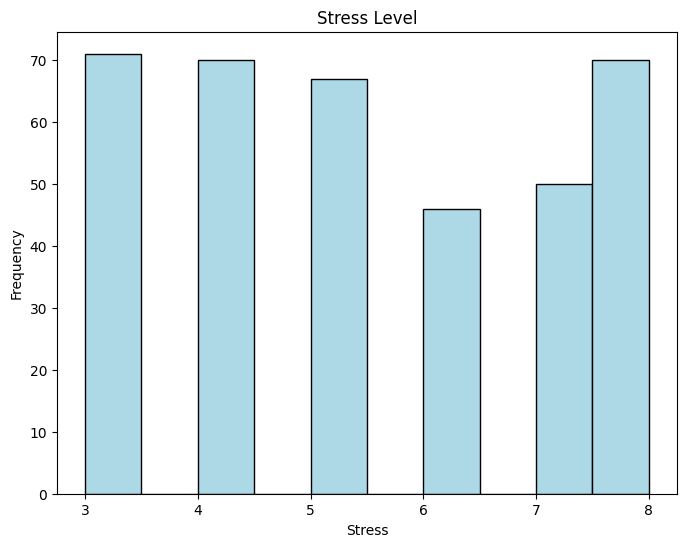

In [ ]:
## Age

plt.figure(figsize=(8, 6))
plt.hist(stresslvl_column, bins=10, color='lightblue', edgecolor='black')
plt.title('Stress Level')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

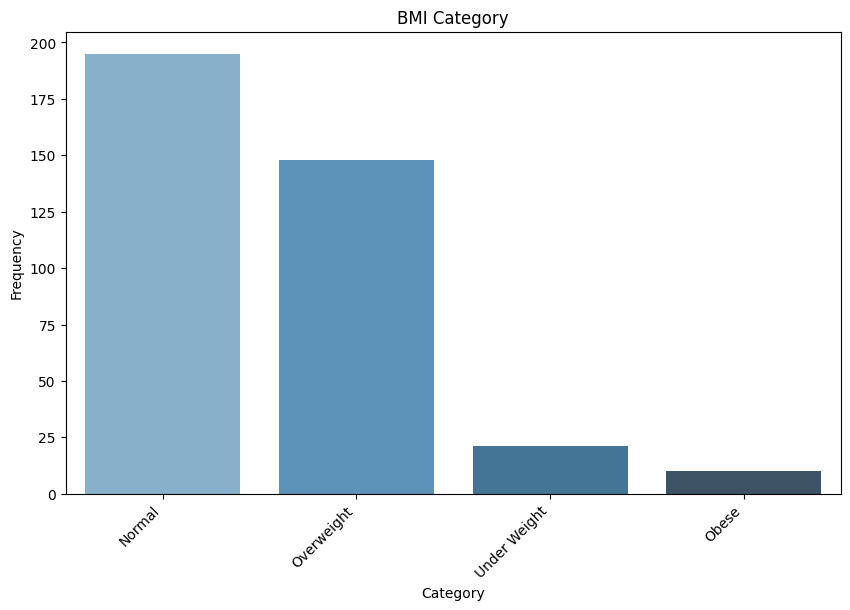

In [ ]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x=BMI_types.index, y=BMI_types.values,hue=BMI_types.index, palette='Blues_d')
plt.title('BMI Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

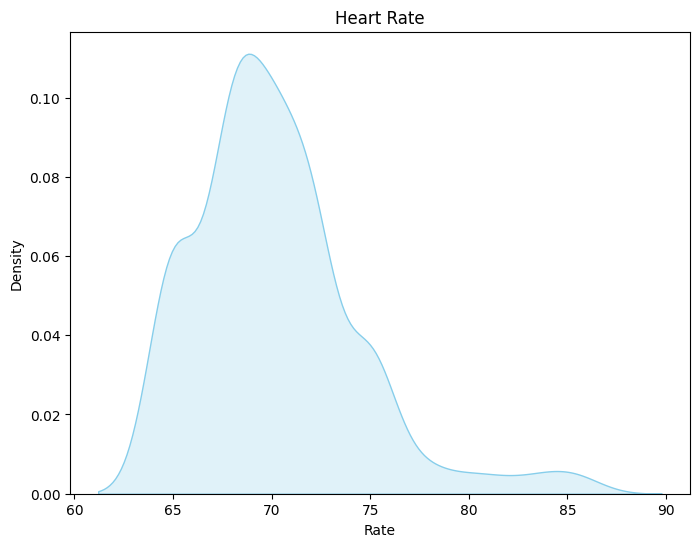

In [ ]:
 ## Sleep Duration



plt.figure(figsize=(8, 6))
sns.kdeplot(df['Heart Rate'], fill=True, color='skyblue')
plt.title('Heart Rate')
plt.xlabel('Rate')
plt.ylabel('Density')
plt.grid(False)
plt.show()

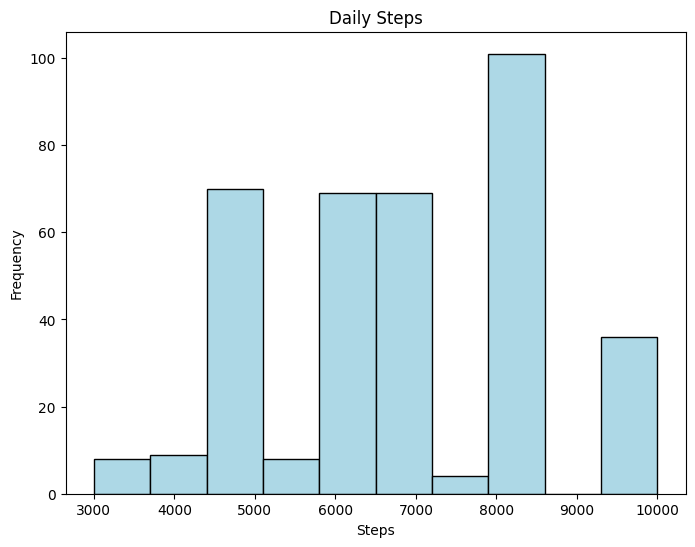

In [ ]:
## Age

plt.figure(figsize=(8, 6))
plt.hist(df['Daily Steps'], bins=10, color='lightblue', edgecolor='black')
plt.title('Daily Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


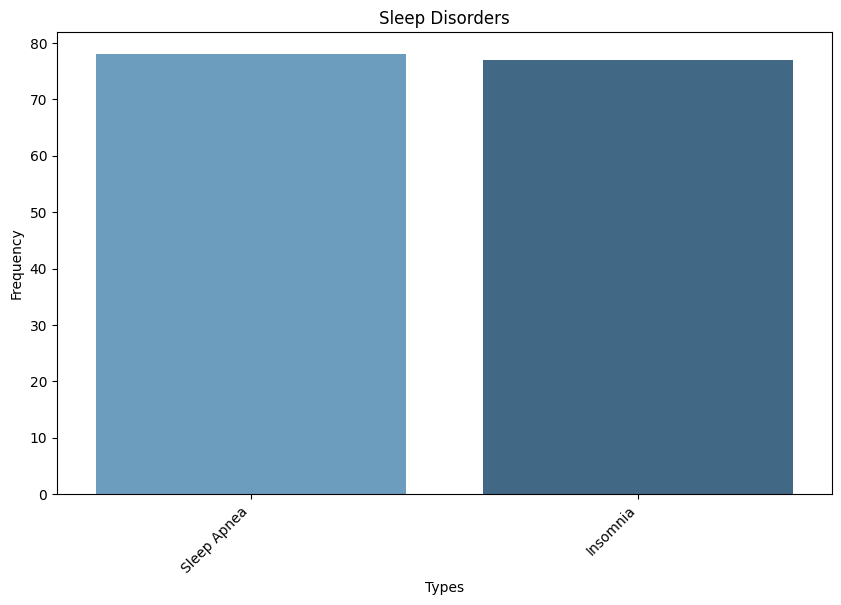

In [ ]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x=disorder_types.index, y=disorder_types.values,hue=disorder_types.index, palette='Blues_d')
plt.title('Sleep Disorders')
plt.xlabel('Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.grid(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

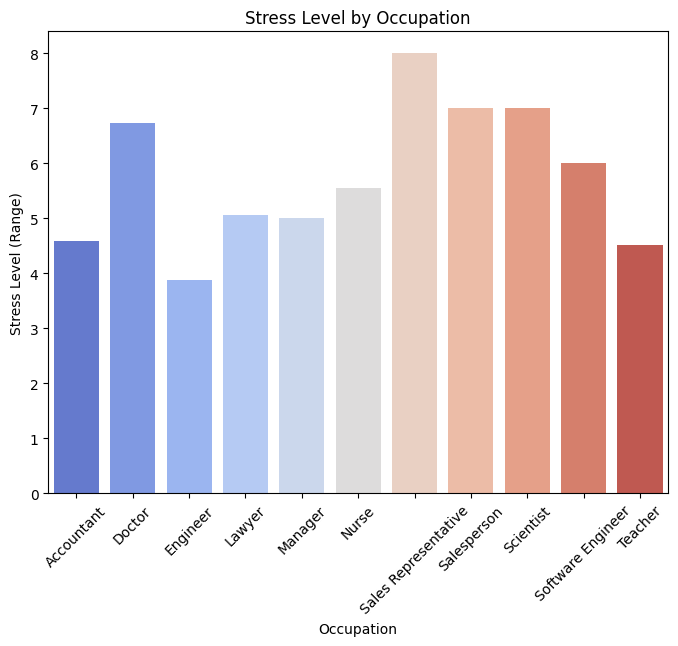

In [ ]:
#TO DO CORRELATION AND DRAW OUT DATA

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')


#STRESS LEVEL AND OCCUPATION

avg_sleep = df.groupby('Occupation')['Stress Level'].mean().reset_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Occupation', y='Stress Level', data=avg_sleep,  hue='Occupation', palette='coolwarm')
plt.title("Stress Level by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Stress Level (Range)")
plt.xticks(rotation=45)
plt.show()






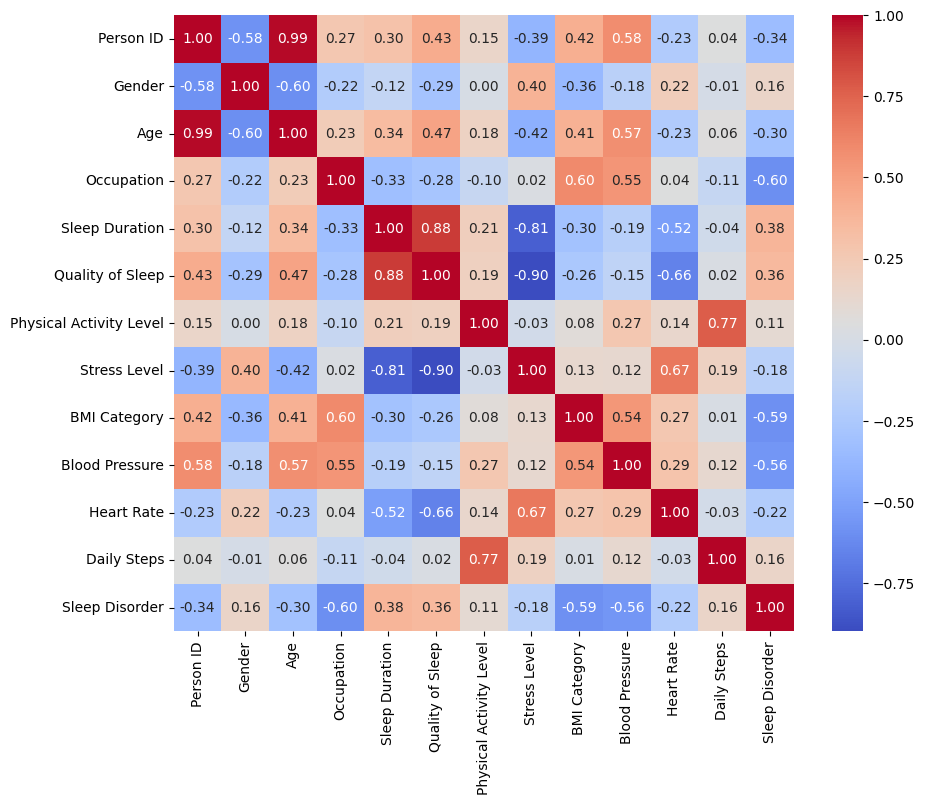

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.show()

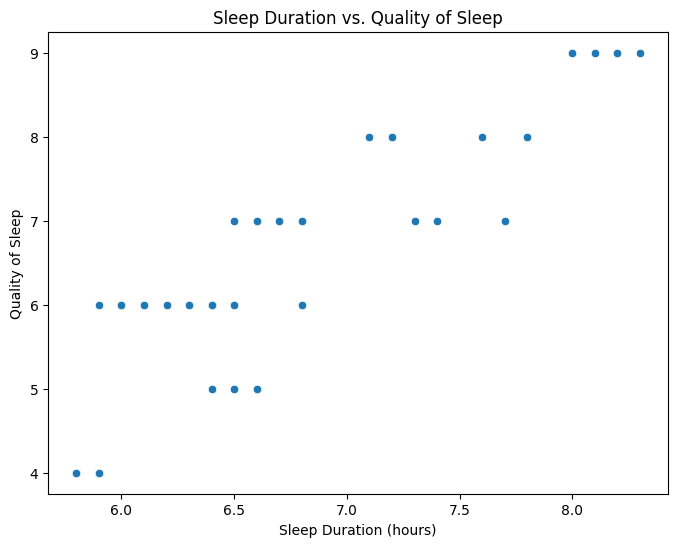

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df_cleaned)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


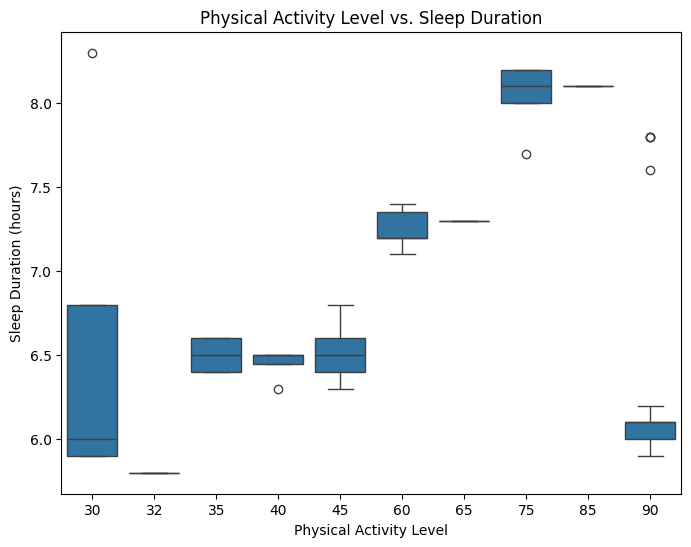

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Physical Activity Level', y='Sleep Duration', data=df_cleaned)
plt.title('Physical Activity Level vs. Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

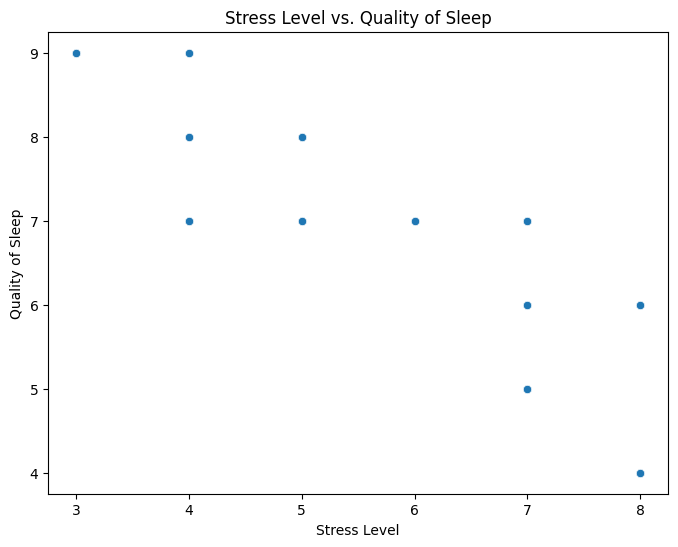

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stress Level', y='Quality of Sleep', data=df_cleaned)
plt.title('Stress Level vs. Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

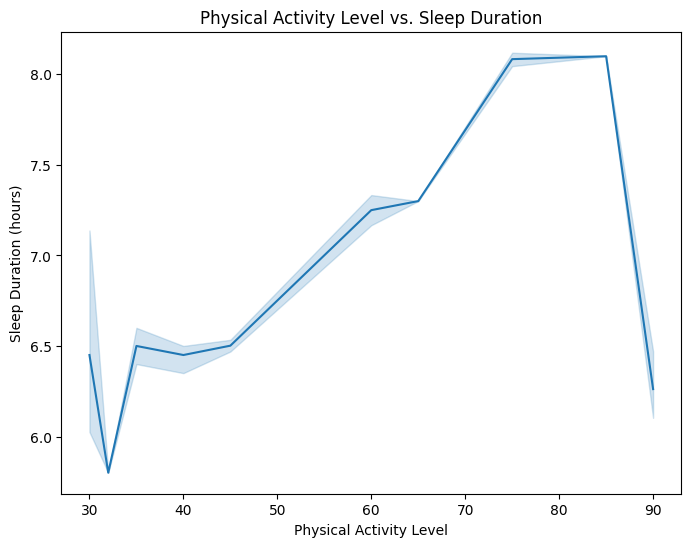

In [ ]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Physical Activity Level', y='Sleep Duration', data=df_cleaned)
plt.title('Physical Activity Level vs. Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration (hours)')
plt.show()

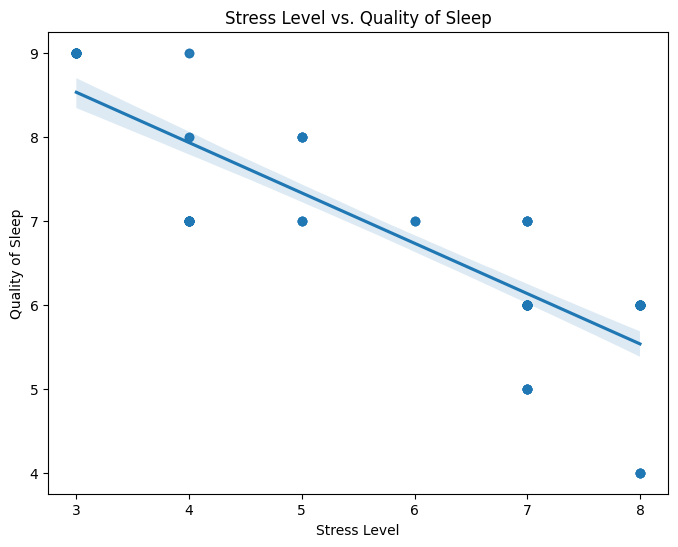

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Stress Level', y='Quality of Sleep', data=df_cleaned)
plt.title('Stress Level vs. Quality of Sleep')
plt.xlabel('Stress Level')
plt.ylabel('Quality of Sleep')
plt.show()

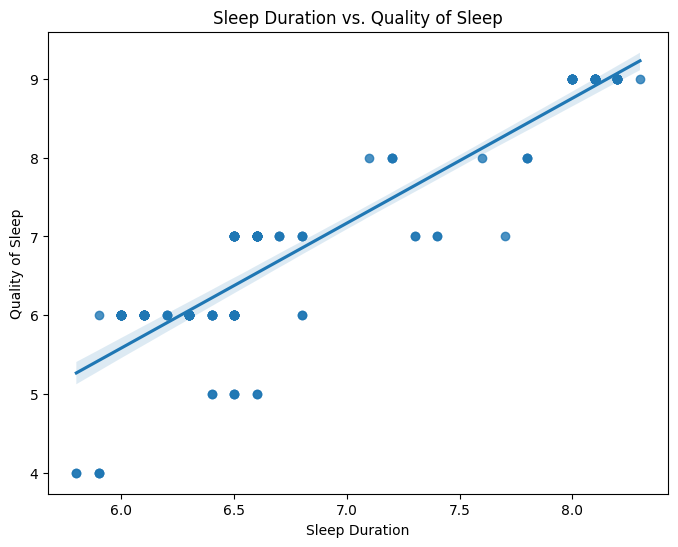

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=df_cleaned)
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

# sleep duration vs Quality of Sleep

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


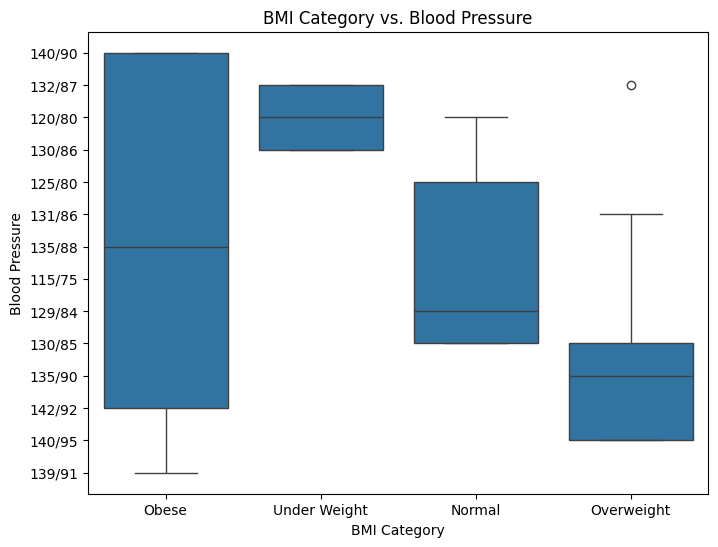

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='BMI Category', y='Blood Pressure', data=df_cleaned)
plt.title('BMI Category vs. Blood Pressure')
plt.xlabel('BMI Category')
plt.ylabel('Blood Pressure')
plt.show()

# BMI Category and Blood Pressure

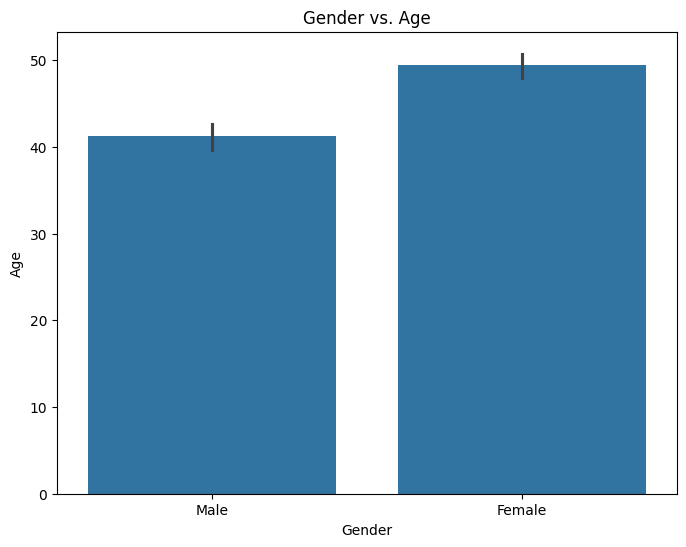

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Age', data=df_cleaned)
plt.title('Gender vs. Age')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

# BMI Category and Blood Pressure

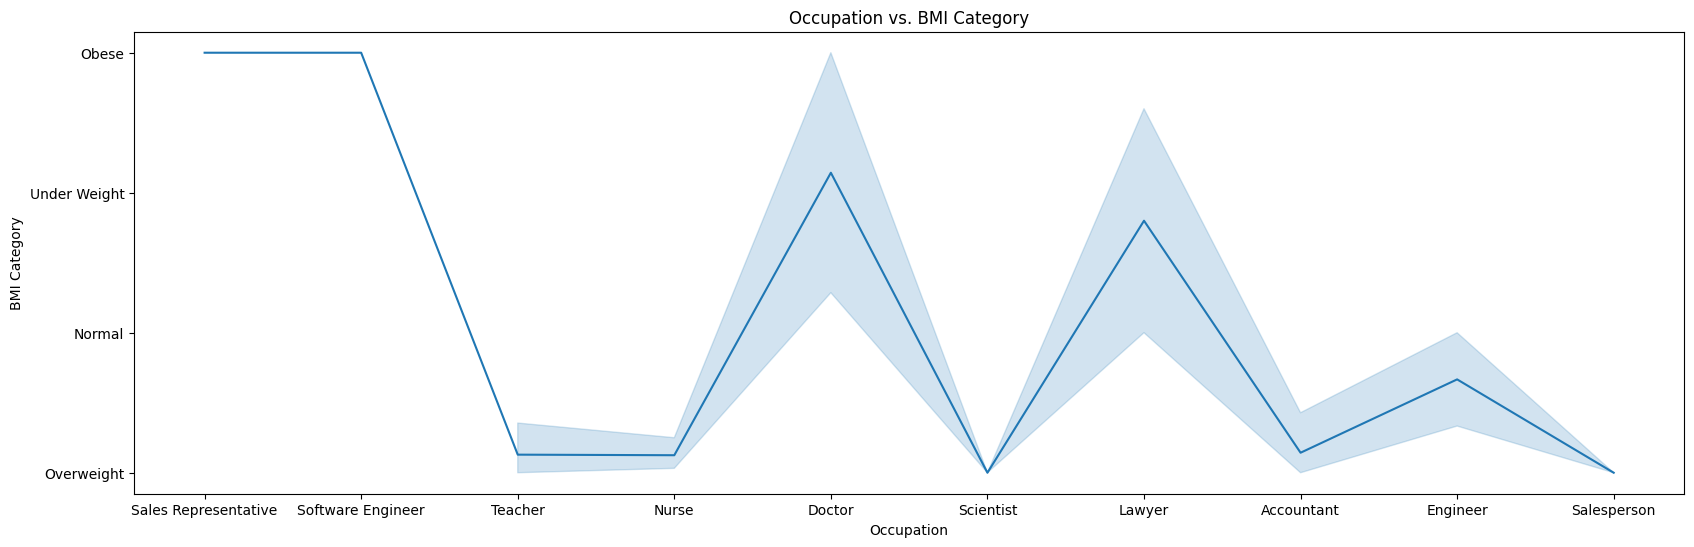

In [ ]:
# Occupation and BMI Category

plt.figure(figsize=(20, 6))
sns.lineplot(x='Occupation', y='BMI Category', data=df_cleaned)
plt.title('Occupation vs. BMI Category')
plt.xlabel('Occupation')
plt.ylabel('BMI Category')
plt.show()

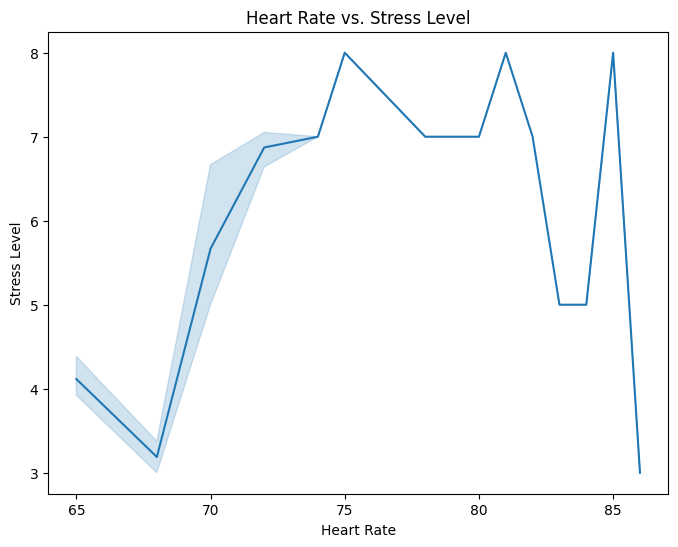

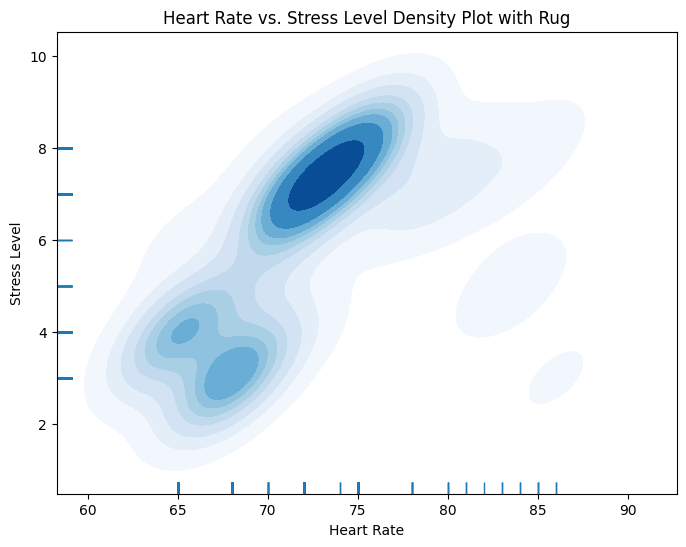

In [ ]:
# Heart Rate and Stress Level

plt.figure(figsize=(8, 6))
sns.lineplot(x='Heart Rate', y='Stress Level', data=df_cleaned)
plt.title('Heart Rate vs. Stress Level')
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(x='Heart Rate', y='Stress Level', data=df_cleaned, cmap="Blues", fill=True)
sns.rugplot(x='Heart Rate', y='Stress Level', data=df_cleaned)
plt.title('Heart Rate vs. Stress Level Density Plot with Rug')
plt.xlabel('Heart Rate')
plt.ylabel('Stress Level')
plt.show()

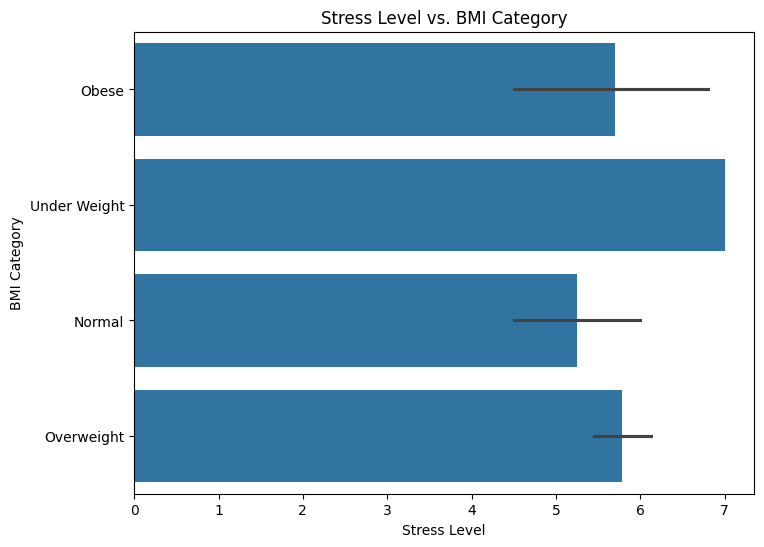

In [ ]:
# Stress Level and BMI Category

plt.figure(figsize=(8, 6))
sns.barplot(x='Stress Level', y='BMI Category', data=df_cleaned)
plt.title('Stress Level vs. BMI Category')
plt.xlabel('Stress Level')
plt.ylabel('BMI Category')
plt.show()

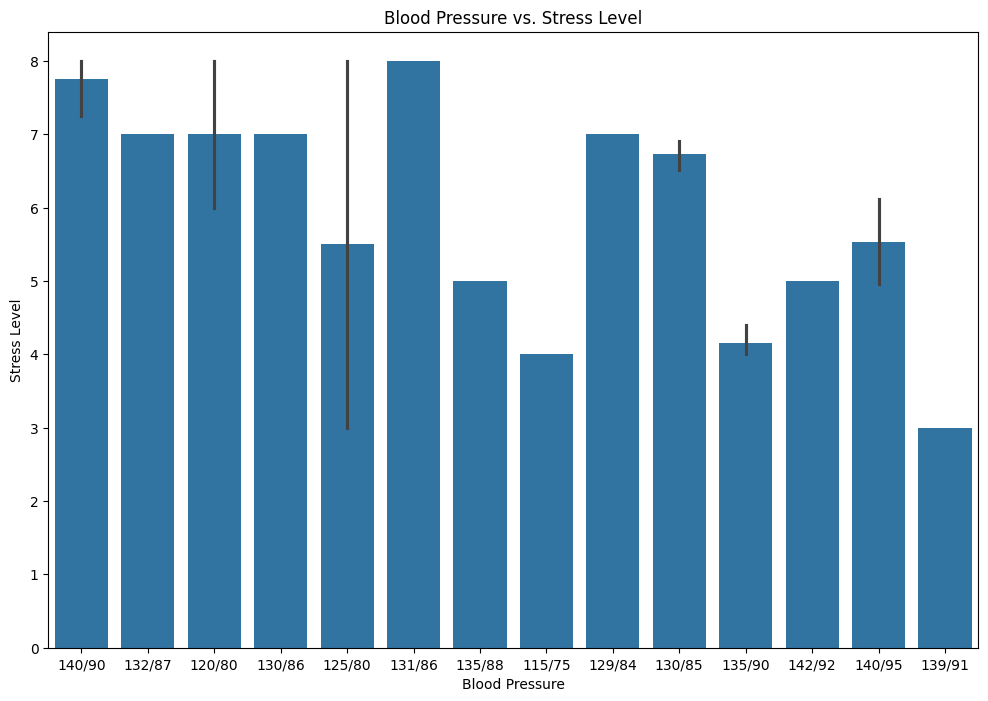

In [ ]:
# Blood Pressure and Stress Level

plt.figure(figsize=(12, 8))
sns.barplot(x='Blood Pressure', y='Stress Level', data=df_cleaned)
plt.title('Blood Pressure vs. Stress Level')
plt.xlabel('Blood Pressure')
plt.ylabel('Stress Level')
plt.show()

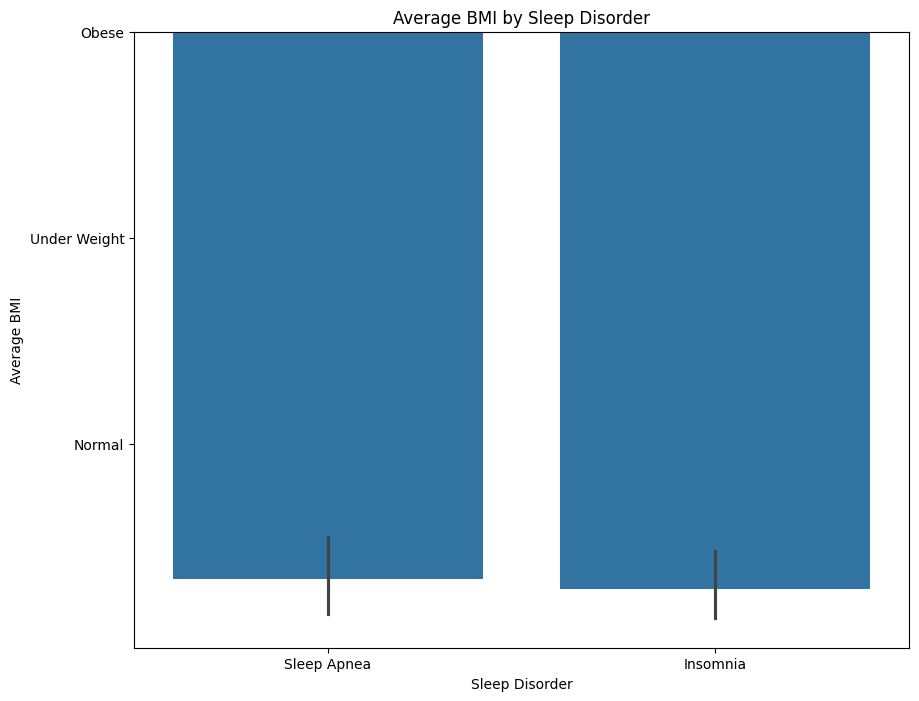

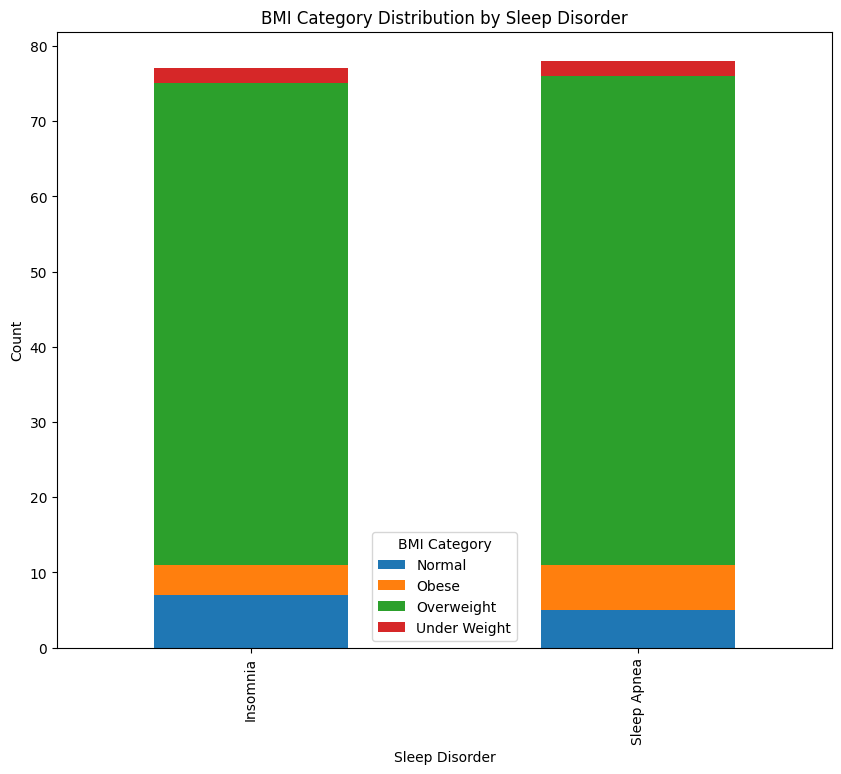

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Sleep Disorder', y='BMI Category', data=df_cleaned)
plt.title('Average BMI by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average BMI')
plt.show()

bmi_counts = df_cleaned.groupby(['Sleep Disorder', 'BMI Category']).size().unstack()
bmi_counts.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('BMI Category Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

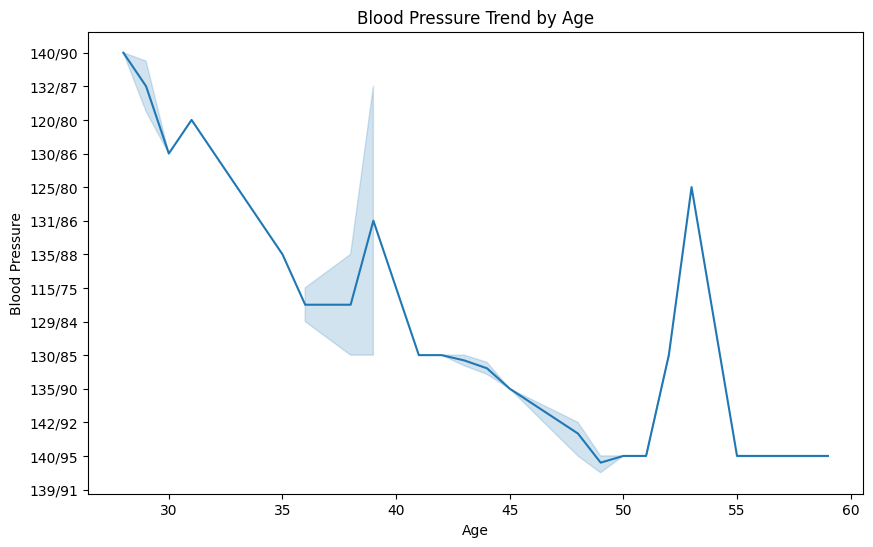

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Blood Pressure', data=df_cleaned)
plt.title('Blood Pressure Trend by Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()

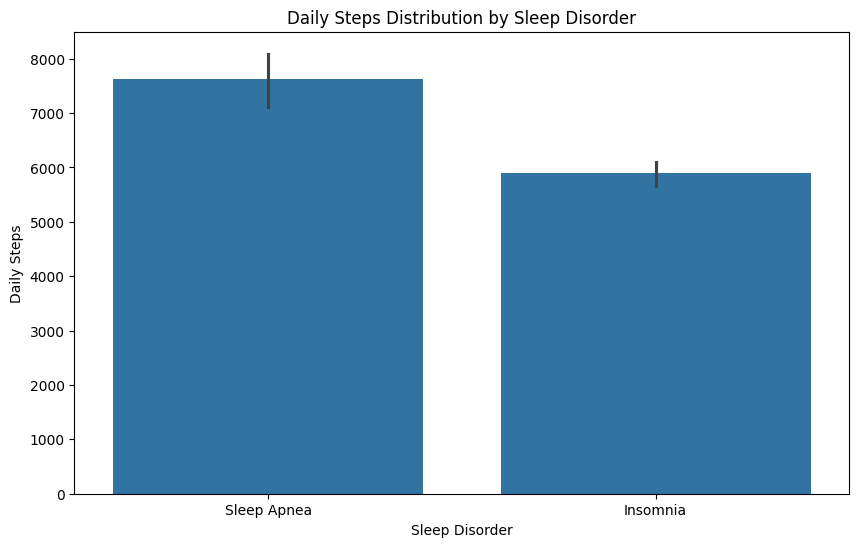

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Daily Steps', data=df_cleaned)
plt.title('Daily Steps Distribution by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Daily Steps')
plt.show()